In [11]:
import json
import pandas as pd

# Read weight data from file
with open("..\Fit\All Data\derived_com.google.weight_com.google.android.g.json") as file:
    weight_data = json.load(file)["Data Points"]

# Read body fat percentage data from file
with open("..\Fit\All Data\derived_com.google.body.fat.percentage_com.goo.json") as file:
    body_fat_data = json.load(file)["Data Points"]

# Create dictionaries to store weight and body fat percentage values by timestamp
weight_dict = {}
body_fat_dict = {}

# Extract weight values and timestamps
for point in weight_data:
    weight = point["fitValue"][0]["value"]["fpVal"]
    timestamp = point["startTimeNanos"]
    weight_dict[timestamp] = weight

# Extract body fat percentage values and timestamps
for point in body_fat_data:
    body_fat_percentage = point["fitValue"][0]["value"]["fpVal"]
    timestamp = point["startTimeNanos"]
    body_fat_dict[timestamp] = body_fat_percentage

# Combine weight and body fat percentage data based on timestamps
timestamps = set(weight_dict.keys()).intersection(body_fat_dict.keys())
weights = [weight_dict[ts] for ts in timestamps]
body_fat_percentages = [body_fat_dict[ts] for ts in timestamps]

# Convert timestamps to dates
dates = pd.to_datetime(list(timestamps), unit="ns").date

# Create a DataFrame with weight, body fat percentage, and date
df = pd.DataFrame({"Date": dates, "Weight": weights, "Body Fat Percentage": body_fat_percentages})

print(df)

           Date     Weight  Body Fat Percentage
0    2019-10-22  90.900002            26.700001
1    2020-06-10  80.800003            22.200001
2    2020-04-26  81.500000            23.000000
3    2019-10-10  91.699997            26.799999
4    2019-10-26  90.199997            27.200001
..          ...        ...                  ...
732  2021-09-15  93.300003            26.799999
733  2022-07-15  89.800003            27.700001
734  2020-03-13  85.099998            24.600000
735  2019-11-05  89.300003            25.400000
736  2020-10-07  85.199997            25.700001

[737 rows x 3 columns]


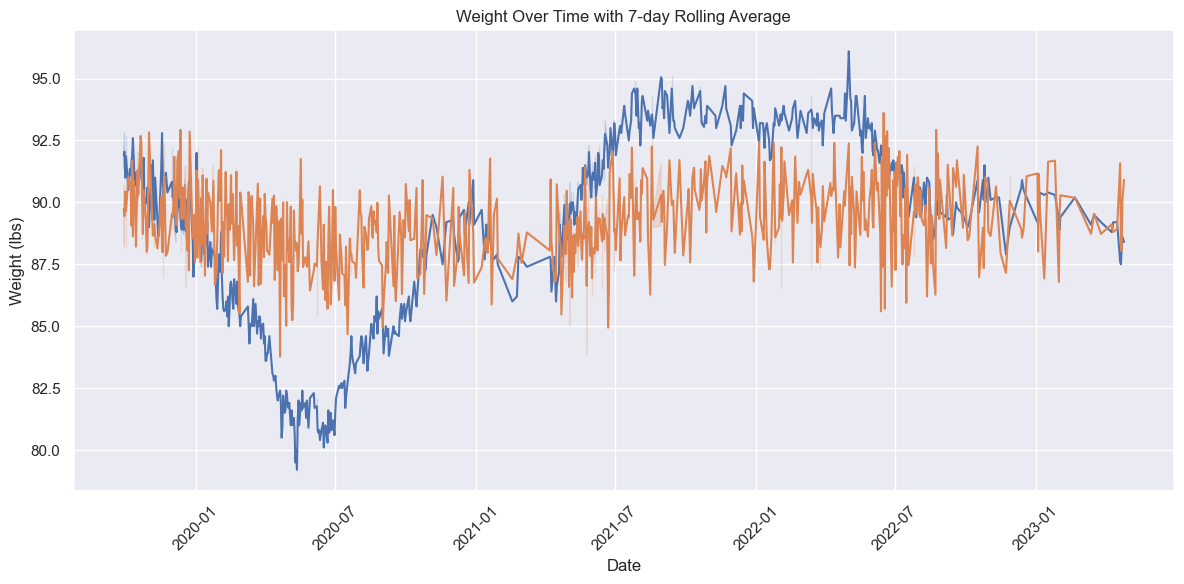

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 7-day rolling average
df["Weight (7-day Avg)"] = df["Weight"].rolling(window=7).mean()

# Create the plot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Weight")
sns.lineplot(data=df, x="Date", y="Weight (7-day Avg)")
plt.xlabel("Date")
plt.ylabel("Weight (lbs)")
plt.title("Weight Over Time with 7-day Rolling Average")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()